# Question_5: Plot the distribution of delay times.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import src.data_processing.data as data

In [3]:
trips = data.full_trips

We see that the majority of stops do not experience delay times

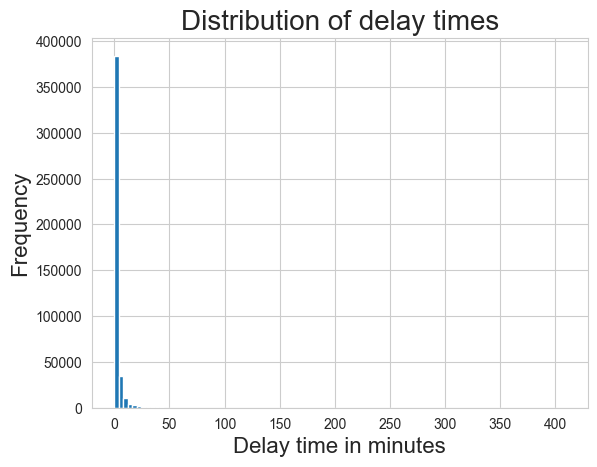

In [4]:
plt.hist(trips['Delay time']/60, bins=100)
plt.xlabel('Delay time in minutes', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Distribution of delay times', fontsize = 20)
plt.show()

We take a delay time of 0 to 1 hour, as delays above 1 hour (relatively) hardly ever occur

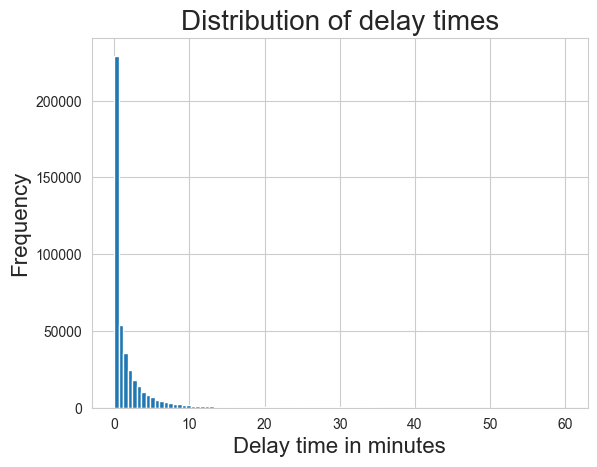

In [7]:
plt.hist(trips['Delay time']/60, bins=100, range=[0,60])
plt.xlabel('Delay time in minutes', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.title('Distribution of delay times', fontsize = 20)
plt.show()

We can also plot this cumulatively

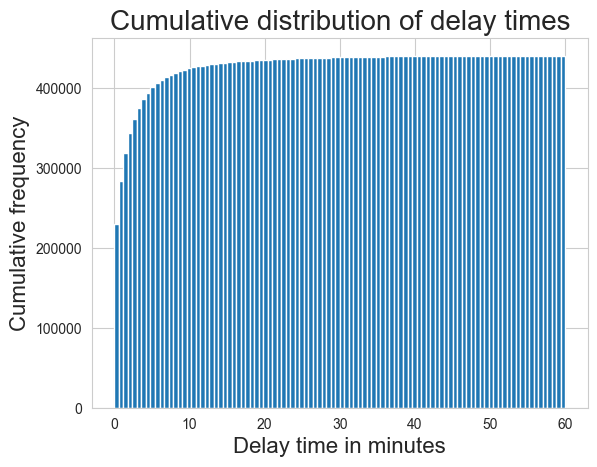

In [31]:
plt.hist(trips['Delay time']/60,cumulative=True , bins =100, range = [0,60])
plt.xlabel('Delay time in minutes', fontsize = 16)
plt.ylabel('Cumulative frequency', fontsize = 16)
plt.title('Cumulative distribution of delay times', fontsize = 20)
plt.show()